# Package loading and basic configurations

In [1]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
from datetime import datetime

from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))

# Querying enviroCar Tracks

The following cell queries tracks from the enviroCar API. It defines a bbox for the area of Münster (Germany) and requests 50 tracks. The result is a GeoDataFrame, which is a geo-extended Pandas dataframe from the GeoPandas library. It contains all information of the track in a flat dataframe format including a specific geometry column. 

In [2]:
#### Köln bbox coordinates
bbox = BboxSelector([
    6.756591796875, # min_x
    50.84583876895451, # min_y
    7.130126953125, # max_x
    51.06729071974382  # max_y
])

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=50) # requesting 50 tracks inside the bbox
track_df.head()

,id,time,geometry,GPS Speed.value,GPS Speed.unit,Rpm.value,Rpm.unit,Consumption.value,Consumption.unit,CO2.value,...,sensor.constructionYear,sensor.manufacturer,Intake Pressure.value,Intake Pressure.unit,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit,O2 Lambda Voltage.value,O2 Lambda Voltage.unit,Calculated MAF.value,Calculated MAF.unit
0,5ced331e44ea8503029199ba,2019-05-27T15:22:55,POINT (7.05132 51.05489),48.294837,km/h,1778.965422,u/min,3.412819,l/h,8.020125,...,2003,Volvo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5ced331e44ea8503029199bc,2019-05-27T15:23:00,POINT (7.05217 51.05517),48.728474,km/h,1827.263196,u/min,5.332561,l/h,12.531518,...,2003,Volvo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5ced331e44ea8503029199bd,2019-05-27T15:23:05,POINT (7.05317 51.05546),55.002977,km/h,2090.507247,u/min,8.826228,l/h,20.741636,...,2003,Volvo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5ced331e44ea8503029199be,2019-05-27T15:23:10,POINT (7.05425 51.05578),61.783353,km/h,1753.334310,u/min,5.029077,l/h,11.818331,...,2003,Volvo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5ced331e44ea8503029199bf,2019-05-27T15:23:15,POINT (7.05530 51.05608),60.628746,km/h,1752.000000,u/min,5.452218,l/h,12.812713,...,2003,Volvo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
track_df.dtypes  ##Columns

id                              object
time                            object
geometry                      geometry
GPS Speed.value                float64
GPS Speed.unit                  object
Rpm.value                      float64
Rpm.unit                        object
Consumption.value              float64
Consumption.unit                object
CO2.value                      float64
CO2.unit                        object
GPS VDOP.value                 float64
GPS VDOP.unit                   object
GPS Altitude.value             float64
GPS Altitude.unit               object
Speed.value                    float64
Speed.unit                      object
Intake Temperature.value       float64
Intake Temperature.unit         object
Throttle Position.value        float64
Throttle Position.unit          object
GPS Accuracy.value             float64
GPS Accuracy.unit               object
GPS Bearing.value              float64
GPS Bearing.unit                object
GPS PDOP.value           

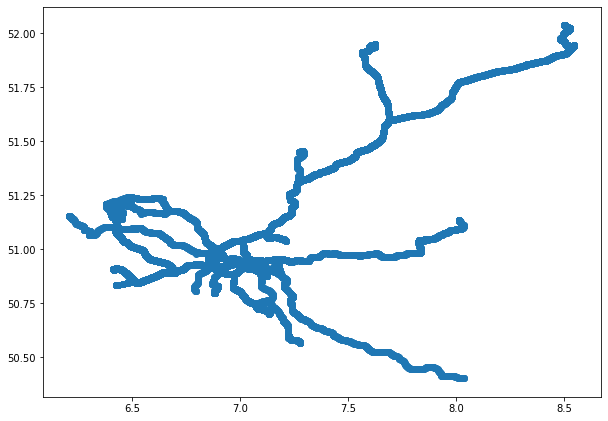

In [4]:
track_df.plot(figsize=(10, 12))

# Inspecting a single Track

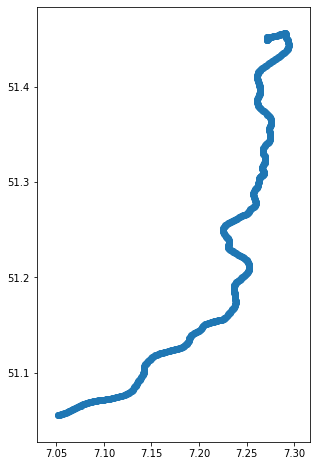

In [5]:
some_track_id = track_df['track.id'].unique()[0]  ### the first one 
some_track = track_df[track_df['track.id'] == some_track_id]
some_track.plot(figsize=(6,8))

### Some basic statistics

In [6]:
####Track basic information
length = some_track['track.length'].sum()
speed = some_track['Speed.value'].mean()
consume = some_track['Consumption.value'].sum()
CO2 = some_track['CO2.value'].sum()

print ('track total length:', round(length/1000,2) , 'km')
print ('track mean speed:', round(speed,2) , some_track['Speed.unit'][0])
print ('track total fuel consumption:', round(consume,2) , some_track['Consumption.unit'][0])
print ('track total CO2 emision:', round(CO2,2) , some_track['CO2.unit'][0])


track total length: 34.56 km
track mean speed: 66.69 km/h
track total fuel consumption: 2189.07 l/h
track total CO2 emision: 5144.33 kg/h


In [7]:
startTime = some_track['time'][0]
endTime = some_track['time'][len(some_track)-1]

startTimeDate = datetime.strptime(startTime, "%Y-%m-%dT%H:%M:%S")
endTimeDate = datetime.strptime(endTime, "%Y-%m-%dT%H:%M:%S")

finalTime = str(endTimeDate -startTimeDate).split(':')
print('track total time:', finalTime[1], 'minutes' , finalTime[2], 'seconds' )

track total time: 50 minutes 25 seconds


In [8]:
some_track_data = some_track[["Speed.value","Consumption.value","CO2.value"]].dropna()
some_track_data.describe() ##basic statistics

,Speed.value,Consumption.value,CO2.value
count,606.000000,606.000000,606.000000
mean,66.686263,3.612335,8.488987
std,14.156874,2.666829,6.267047
min,1.488987,0.478009,1.123322
25%,62.333728,1.249388,2.936062
50%,70.684275,2.941223,6.911874
75%,76.041515,5.265204,12.373230
max,88.000003,14.586132,34.277410


The track with id '5ced331e44ea8503029199b8' has a total of 606 segments. For each segment there is not null information about <code>CO2 emission</code>, <code>Consumption</code> and <code>Speed</code>.

Basic statistics show that:
- Most of CO2 and consumption aren't concentrated around the mean value.
- There is a high level of dispersion in CO2 and consumption variables.
- None of the variables is simetric
- Maximun values for CO2 and compsumtion could be outliers

### some basic visualization

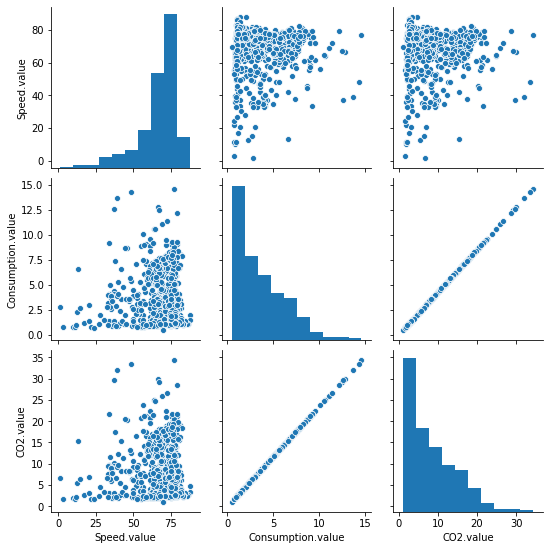

In [9]:
sns.pairplot(some_track_data)

The scatterplot matrix shows that consumption and CO2 values are highly positive correlated (probably one variable is a linear combination of the other); both variables don't follow a normal distribution but rather an ex-gaussian or log-normal one, based on visual analysis of the sample histograms. 

Most of the values for CO2 and consumption are low and are gathered between 0-5 and 1-8 respectively. Speed and other variables don't seem to be correlated. 

However, values for CO2 and consumption are mostly congregated at speeds greater than 50 km/h; the higher the speed, the more CO2 emissions expected. Speed values could follow a normal with high kurtosis distribution (logistic).

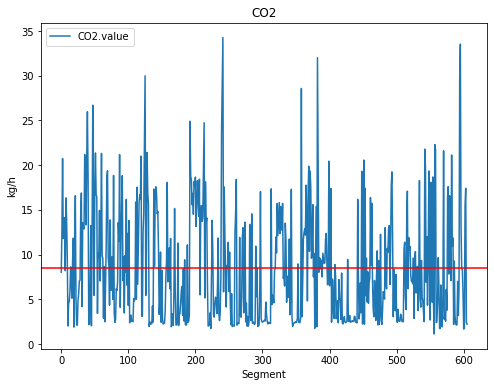

In [10]:
## analyzing CO2 emissions
ax = some_track['CO2.value'].plot(figsize=(8,6))
ax.axhline(some_track['CO2.value'].mean(), color='r')
ax.set_title("CO2")
ax.set_ylabel(some_track['CO2.unit'][0])
ax.set_xlabel('Segment')
ax.legend()
ax

The plot above represents the CO2 value in each track segment, which translates as a time series for CO2 (since each segment represents a specific ordered period). Some outliers can be identified (highest CO2 emissions). No significant shifts or trends are detected. The data seems to show random variation through time.

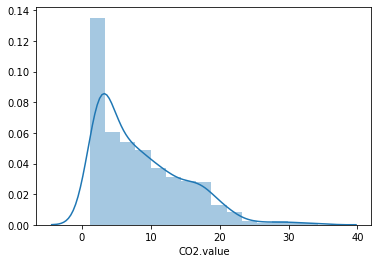

In [11]:
sns.distplot(some_track['CO2.value'])

As it was discusted before, <code>CO2.value</code> variable don't follow a normal distribution. The variable is assimetric and left-skewed. The data has an upper bound, which means that most of track segments have low carbon emissions.



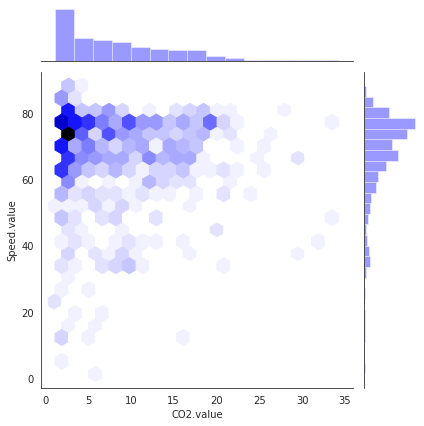

In [12]:
with sns.axes_style("white"):
    sns.jointplot(x="CO2.value", y="Speed.value", data=some_track, kind="hex", color="b");

The scatterplot for <code>CO2</code> and <code>Speed</code> shows that there is not apparent corrleation between the variables. Nevertheless, CO2 emissions are more likely to happend in high speeds.

## Interactive Map
The following map-based visualization makes use of folium. It allows to visualizate geospatial data based on an interactive leaflet map. Since the data in the GeoDataframe is modelled as a set of Point instead of a LineString, we have to manually create a polyline

In [13]:
import folium

lats = list(some_track['geometry'].apply(lambda coord: coord.y))
lngs = list(some_track['geometry'].apply(lambda coord: coord.x))

avg_lat = sum(lats) / len(lats)
avg_lngs = sum(lngs) / len(lngs)

m = folium.Map(location=[avg_lat, avg_lngs], tiles='Stamen Terrain',  zoom_start=10)
folium.PolyLine([coords for coords in zip(lats, lngs)], color='black').add_to(m)
m

# Example: Visualization with pydeck (deck.gl)

The pydeck library makes use of the basemap tiles from Mapbox. In case you want to visualize the map with basemap tiles, you need to register with MapBox, and configure a specific access token. The service is free until a certain level of traffic is esceeded.

You can either configure it via your terminal (i.e. `export MAPBOX_API_KEY=<mapbox-key-here>`), which pydeck will automatically read, or you can pass it as a variable to the generation of pydeck (i.e. `pdk.Deck(mapbox_key=<mapbox-key-here>, ...)`.

In [14]:
import pydeck as pdk

# for pydeck the attributes have to be flat
track_df['lat'] = track_df['geometry'].apply(lambda coord: coord.y)
track_df['lng'] = track_df['geometry'].apply(lambda coord: coord.x)
vis_df = pd.DataFrame(track_df)
vis_df['speed'] = vis_df['Speed.value']

# omit unit columns
vis_df_cols = [col for col in vis_df.columns if col.lower()[len(col)-4:len(col)] != 'unit']
vis_df = vis_df[vis_df_cols]

layer = pdk.Layer(
    'ScatterplotLayer',
    data=vis_df,
    get_position='[lng, lat]',
    auto_highlight=True,
    get_radius=20,          # Radius is given in meters
    get_fill_color='[speed < 20 ? 0 : (speed - 20)*8.5, speed < 50 ? 255 : 255 - (speed-50)*8.5, 0, 140]',  # Set an RGBA value for fill
    pickable=True
)

# Set the viewport location
view_state = pdk.ViewState(
    longitude= 6.953101,
    latitude= 50.935173,
    zoom=10,
    min_zoom=5,
    max_zoom=15,
    pitch=40.5,
    bearing=-27.36)

r = pdk.Deck(
    width=200, 
    layers=[layer], 
    initial_view_state=view_state ,
    mapbox_key= 'pk.eyJ1IjoiZGF2aWRwYXlhcmVzIiwiYSI6ImNrMzQ4c2RteTA2cG0zcG80NWtnYnFhcjYifQ.pnf11sacPh-hDJ8QJm8u-w'
)
r.to_html('tracks_muenster.html', iframe_width=900)

'D:\\M.Sc. Gesopatial Tecnologies\\Courses\\SIW012 - Floating Car Project\\Assignments\\Assignment 1\\envirocar-py\\examples\\tracks_muenster.html'

### Heatmap for CO2 emissions

In [15]:
from folium.plugins import HeatMap

def generateBaseMap(default_location=[50.935173, 6.953101], default_zoom_start=11):
    baseMap = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return baseMap

track_df_heat = track_df[track_df['CO2.value'] > 0][['CO2.value','lat','lng']].dropna().copy()

base_map = generateBaseMap()
HeatMap(data = track_df_heat[['lat', 'lng', 'CO2.value']].groupby(['lat','lng']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

base_map